# Cleaining the Photometry and save the SEDs data

In [1]:
import numpy as np
import time
import astropy.units as u
from astropy.table import Table, vstack, unique
from pathlib import Path
from matplotlib import pyplot as plt

import CleanPhotometry as CP #Code to clean the Photometry and ignore empty values in the tables

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.container { font-size:18px !important; }</style>"))

In [2]:
path_raw='../Datos/Raw/'
path_phot_ned = '../Datos/Work/Phot_Tables_NED/' #In this path wi will save the photometry tables for each object
path_phot_cds = '../Datos/Work/Phot_Tables_CDS/'
path_SED = '../Datos/Work/SEDs/'
Path(path_SED).mkdir(parents=True, exist_ok=True)

### Eliminating photometric duplicates between NED and CDS Tables:

The next function checks the rows of the CDS and NED photometric tables and remove the duplicate data in the photometric bands:

In [3]:
def check_both_tables(ned,cds):
    to_rem = [] #Rows to be deleted or removed
    for u_refcode in np.unique(ned['Refcode']): #For each bibcode
        l_cds = np.where(cds['Bibcode'] == u_refcode)[0]# Save the index in CDS table where is the bibcode selected
        l_ned = np.where(ned['Refcode'] == u_refcode)[0]# Save the index in NED table where is the bibcode selected
        if len(l_cds) > 0 and len(l_ned) > 0:
            print('Duplicate!')
            for lcds in l_cds: #For each index found
                for lned in l_ned:
                    flx_ned = str(ned[lned]['Flux_Density'])#Get the flux values in each tables
                    flx_cds = str(cds[lcds]['sed_flux'])
                    if flx_ned == flx_cds: #If the fluxes values are equel then...
                        print('Deleting NED filter ',ned[lned]['Observed_Passband'],
                              ' with Bibcode ',ned[lned]['Refcode'])                         
                        to_rem.append(lned) #Save the index to be removed in NED table because is duplicated in CDS
    print(to_rem)
    ned.remove_rows(to_rem)
    
    return ned

In [4]:
date_sample = 'Sep_02_2022'
date_sample_2 = 'May_29_2023'
NeIR_Sy_t = Table.read(path_raw+'Obj_Sy_Ne-IR_'+date_sample+'.vot',format='votable')
NeIR_QSO_t = Table.read(path_raw+'Obj_QSO_Ne-IR_'+date_sample_2+'.vot',format='votable')
NeIR_Sy_t.show_in_notebook()

idx,Main_Id,Id_used_NED,RA,DEC,otype_txt,redshift,rvz_type,ids,otypes,cds_url,SMB_sample_index,NED_Ne_IR_info
0,3C 234.0,3C 234.0,150.45634473807,28.7858176354,Sy1,0.18494,z,Gaia DR3 743659018773360128|WISEA J100149.52+284708.9|2MASX J10014950+2847089|GRA B0959+28|GRA J1001+28|1Jy 0958+290|1Jy 0958+29|3C 234.0|3C 234|3CR 234|4C 29.35|7C 0958+2901|B2 0958+29|B2.2 0958+29|BWE 0958+2901|CSO 31|CTA 49|CTD 64|Cul 0958+290|Cul 0958+29|DA 280|DB 72|GB6 B0958+2901|INTREF 402|IRAS 09589+2901|IRAS F09589+2901|LEDA 139234|LHE 265|MITG J100147+2846|NRAO 343|OHIO L 200|QSO B0958+290|S2 0958+29|TXS 0958+290|UT 0958+290|VRO 29.09.03|WB 0958+2901|[ATI98] 095851+2910|[BDW2002] q0958+2901|[HB91] 0958+290|[W72] 0958+29|[WTW94] 0958+290|[GW2008] CoNFIG 64|87GB 095856.9+290154|[VV2000c] J100149.5+284710|[VV2003c] J100149.5+284710|[VV2006c] J100149.5+284710|[VV98c] J100149.5+284710|SDSS J100149.52+284708.9|[VV2010c] J100149.5+284710|WISE J100149.52+284709.0|AKARI-IRC-V1 J1001495+284708|EQ J1001+287|PBC J1001.8+2847|NVSS J100146+284656|7C 095855.89+290131.00|[CAB95] IRAS F09589+2901|VLSS J1001.8+2847|SWIFT J1001.8+2848|Gaia DR2 743659018773360128,*|AGN|G|IR|QSO|Rad|Sy1|X|blu|gam,http://vizier.u-strasbg.fr/viz-bin/sed?-c=150.45634473807%2028.7858176354&-c.rs=5,283.0,NeII|NeIII|NeV
1,2MASS J13000535+1632148,NVSS J130005+163212,195.02228295163,16.53743305218,Sy1,0.07993,z,Gaia DR3 3937375195178654720|TIC 88137340|2MASS J13000535+1632148|NVSS J130005+163212|2MASX J13000533+1632151|2MASSI J1300053+163214|2MASS J13000534+1632149|FIRST J130005.3+163214|[VV2003c] J130005.3+163214|[VV2006c] J130005.3+163214|[VV2010c] J130005.3+163214|PBC J1300.1+1636|SDSS J130005.34+163214.8|SDSS J130005.35+163214.8|LEDA 3800210|SWIFT J1300.1+1635|AKARI-IRC-V1 J1300053+163214|Gaia DR2 3937375195178654720,*|AGN|G|IR|Rad|Sy1|X,http://vizier.u-strasbg.fr/viz-bin/sed?-c=195.02228295163%2016.53743305218&-c.rs=5,428.0,NeII|NeIII
2,NGC 262,NGC 262,12.196426138730002,31.956956641230004,Sy2,0.015260233939595302,v,Gaia DR3 360927649734789248|LAMOST J004847.14+315725.1|IERS B0046+316|[KRL2007b] 7|2E 189|1AXG J004847+3157|2E 0046.0+3140|B2.1 0046+31|BWE 0046+3141|GB6 B0046+3140|INTREF 37|IRAS 00461+3141|IRAS F00460+3141|JVAS J0048+3157|JVAS B0046+316|LEDA 2855|MAPS-PP O-601-810121|MCG+05-03-008|MITG J004846+3156|Mrk 348|NGC 262|NPM1G +31.0015|NVSS J004847+315725|Gaia DR1 360927645439037056|UVQS J004847.14+315725.0|TXS 0046+316|UGC 499|WB 0046+3141|WN B0046.0+3141|XSS J00485+3203|Z 501-20|[BTW2003] J0048+3159|[DML87] 16|[HB91] 0046+316|2MASX J00484711+3157249|2XMM J004847.1+315724|1RXP J004847.4+315716|87GB 004606.1+314104|ICRF J004847.1+315725|MY 004604.0+314145.8|SWIFT J0048.8+3155|SWIFT J0048.8+3157|Z 0046.1+3142|[CHM2007] HDC 36 J004847.11+3157249|[CHM2007] LDC 43 J004847.11+3157249|[M98c] 004604.4+314100|[VV2000c] J004847.2+315725|[VV2003c] J004847.2+315725|[VV2006c] J004847.2+315725|[VV98c] J004847.2+315725|UZC J004847.2+315725|CGRaBS J0048+3157|PSCz Q00461+3141|[MGL2009] BZU J0048+3157|PBC J0048.7+3157|SWIFT J0048.7+3157|MAXI J0048+320|[VV2010c] J004847.2+315725|QSO J0048+3157|QSO B0046+316|[MML2015] 5BZG J0048+3157|[CAB95] IRAS F00460+3141|CLASS J004847.1435+315725.092|2MAXI J0048+320|Gaia DR2 360927649734789248,*|AGN|Bla|G|GiG|IR|QSO|Rad|Sy2|X|gam,http://vizier.u-strasbg.fr/viz-bin/sed?-c=12.196426138730002%2031.956956641230004&-c.rs=5,484.0,NeII|NeIII|NeV
3,IRAS 04385-0828,IRAS 04385-0828,70.2290037068,-8.37281297812,Sy2,0.015064,z,Gaia DR3 3186063094441390720|6dFGS gJ044055.0-082222|IRAS F04385-0828|IRAS 04385-0828|LEDA 15806|NPM1G -08.0177|[DML87] 141|[HB91] 0438-084|[VFT93] 0438-0828|[VV2000c] J044055.0-082222|[VV2003c] J044055.0-082222|[VV2006c] J044055.0-082222|2MASX J04405494-0822221|[CHM2007] HDC 310 J044054.94-0822221|[CHM2007] LDC 330 J044054.94-0822221|[VV98c] J044053.3-082228|PSCz Q04385-0828|IRAS 0438-084P11|[VV2010c] J044055.0-082222|Gaia DR2 3186063094440691200,*|AGN|G|GiG|IR|Sy2,http://vizier.u-strasbg.fr/viz-bin/sed?-c=70.2290037068%20-8.37281297812&-c.rs=5,541.

### Cleaining the Photometry, ignore empty values and saving the SEDs data

### Seyfert:

In [5]:
start_cds = time.time()
for i, id_ in enumerate(NeIR_Sy_t['Main_Id']):
    print(i,' ',id_,':')
    cds_table = Table.read(path_phot_cds+NeIR_Sy_t['Main_Id'][i]+'_CDS_phot_tables'+'.vot',
                           format='votable')
    NED_table = Table.read(path_phot_ned+NeIR_Sy_t['Main_Id'][i]+'_NED_phot_tables'+'.vot',
                           format='votable')          
    ned_table = check_both_tables(NED_table,cds_table)
    cleaned = CP.CleanPhotometry(cds_table, ned_table)
    SED = cleaned.final_tab
    BIBCODES = ';'.join(cleaned.bib_codes)
    with open("../Datos/Work/Bibcodes_SED.csv", "a+") as file_bibcodes:
        file_bibcodes.writelines([id_+',', BIBCODES+'\n'])
        file_bibcodes.close()
    SED.write(path_SED+id_+'_Phot.txt', format='ascii',overwrite=True)
    print(id_, 'Finish\n')
end_cds = time.time()

print('\nExecution Time(seg): ' + str(end_cds - start_cds))
print('Execution Time(min): ' + str((end_cds - start_cds)/60))
print('Execution Time(hrs): ' + str((end_cds - start_cds)/3600))

0   3C 234.0 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  2014AJ....148...16S
Duplicate!
[177, 163, 155, 136, 124, 173, 134, 217]
Cleaning
3C 234.0 Finish

1   2MASS J13000535+1632148 :
[]
Cleaning
2MASS J13000535+1632148 Finish

2   NGC   262 :
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  8.4 GHz (VLA)  with Bibcode  2007ApJS..171...61H
Duplicate!
Du

### QSO:

In [6]:
start_cds = time.time()
for i, id_ in enumerate(NeIR_QSO_t['Main_Id']):
    print(i,' ',id_,':')
    cds_table = Table.read(path_phot_cds+NeIR_QSO_t['Main_Id'][i]+'_CDS_phot_tables'+'.vot',
                           format='votable')
    NED_table = Table.read(path_phot_ned+NeIR_QSO_t['Main_Id'][i]+'_NED_phot_tables'+'.vot',
                           format='votable')          
    ned_table = check_both_tables(NED_table,cds_table)
    cleaned = CP.CleanPhotometry(cds_table, ned_table)
    SED = cleaned.final_tab
    BIBCODES = ';'.join(cleaned.bib_codes)
    with open("../Datos/Work/Bibcodes_SED.csv", "a+") as file_bibcodes:
        file_bibcodes.writelines([id_+',', BIBCODES+'\n'])
        file_bibcodes.close()
    SED.write(path_SED+id_+'_Phot.txt', format='ascii',overwrite=True)
    print(id_, 'Finish\n')
end_cds = time.time()

print('\nExecution Time(seg): ' + str(end_cds - start_cds))
print('Execution Time(min): ' + str((end_cds - start_cds)/60))
print('Execution Time(hrs): ' + str((end_cds - start_cds)/3600))

0   QSO B1549-790 :
Duplicate!
Duplicate!
Deleting NED filter  18.5 GHz (ATCA)  with Bibcode  2006A&A...445..465R
Deleting NED filter  22 GHz (ATCA)  with Bibcode  2006A&A...445..465R
Duplicate!
Deleting NED filter  5 GHz (ATCA)  with Bibcode  2006AJ....131..114B
Duplicate!
Deleting NED filter  8.4 GHz  with Bibcode  2007ApJS..171...61H
Duplicate!
Deleting NED filter  5 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Deleting NED filter  8 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Deleting NED filter  20 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Duplicate!
[95, 92, 108, 101, 111, 103, 94]
Cleaning
QSO B1549-790 Finish

1   3C  48 :
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  1970A&AS....1..281C
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting N

### Plotting the SEDs from NED and CDS

The next funcion plots the SED directly from the data obteined in the photmetry tables downloades from NED and CDS and previosly saved in the hard disk.

In [7]:
def plotSED(idx_obj,NeIR_obj_t):
    print(NeIR_obj_t['Main_Id'][idx_obj])
    cds_t = Table.read(path_phot_cds+NeIR_obj_t['Main_Id'][idx_obj]+'_CDS_phot_tables'+'.vot',format='votable')                 
    ned_t = Table.read(path_phot_ned+NeIR_obj_t['Main_Id'][idx_obj]+'_NED_phot_tables'+'.vot',format='votable')
    plt.figure(figsize=(7,3))
    plt.scatter(cds_t['sed_freq'].to(u.micron, equivalencies=u.spectral()),  
                cds_t['sed_flux']*1000,s=70,label='CDS')
    plt.scatter(ned_t['Frequency'].to(u.micron, equivalencies=u.spectral()),
                ned_t['Flux_Density']*1000, marker='*',s=70,label='NED')
    plt.loglog()
    plt.xlabel(r'Wavelength [$\mu$m]',fontsize=14)
    plt.ylabel('Flux [mJy]',fontsize=14)
    plt.grid(color='k', linestyle='--', linewidth=0.05)
    plt.legend()                    

LEDA 3096524


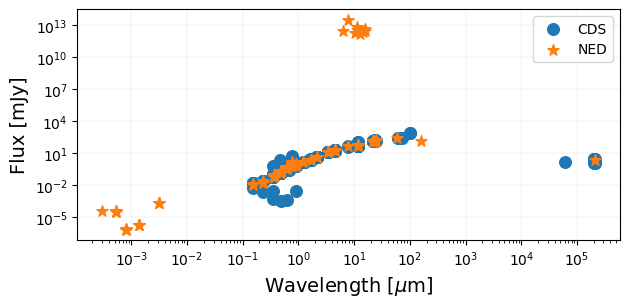

In [8]:
plotSED(92,NeIR_Sy_t)

### Plotting some obteined SED  

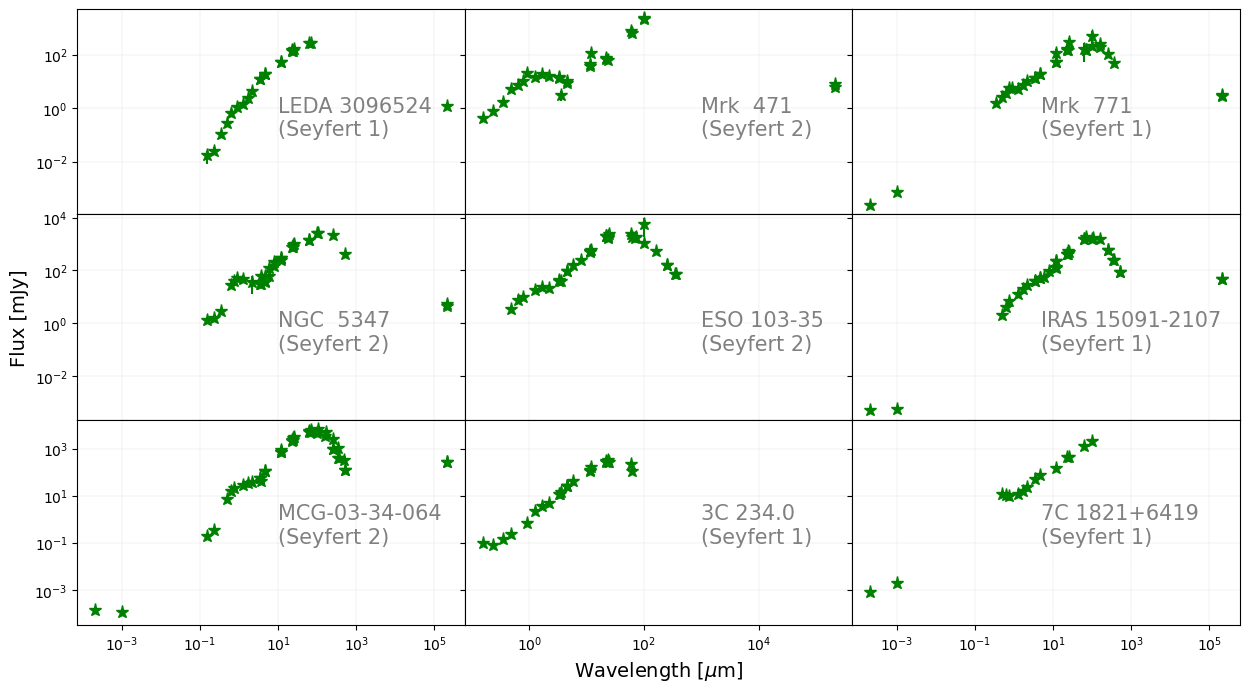

In [9]:
seyferts = ['LEDA 3096524','Mrk  471','Mrk  771',
            'NGC  5347','ESO 103-35','IRAS 15091-2107',
            'MCG-03-34-064','3C 234.0','7C 1821+6419']
types = ['(Seyfert 1)','(Seyfert 2)','(Seyfert 1)',
         '(Seyfert 2)','(Seyfert 2)','(Seyfert 1)',
         '(Seyfert 2)','(Seyfert 1)','(Seyfert 1)']

fig, axs = plt.subplots(3,3,figsize=(15,8),sharex='col',sharey='row')

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
line_width = 0.8

i=0
j=0

for sed, gal in enumerate(seyferts):
    seds = Table.read(path_SED+gal+'_Phot.txt', format='ascii')
    axs[i,j].errorbar(seds['Wave'],seds['Flux']*1000,
                      yerr=seds['F_er']*1000,fmt='*g',markersize=9.5)
    axs[i,j].loglog()
    axs[i,j].grid(color='k', linestyle='--', linewidth=0.05)
    if i==0:
        y=1e-1
    elif i==1 or i==2:
        y=1e-1
    if j==0:
        x=10
    elif j==1:
        x=10e2
    elif j==2:
        x=5
    axs[i,j].text(x,y,gal+'\n'+types[sed],fontsize=15,color='gray')
    j+=1
    if j>2:
        i+=1
        j=0

axs[1,0].set_ylabel('Flux [mJy]',fontsize=14)
axs[2,1].set_xlabel(r'Wavelength [$\mu$m]',fontsize=14)
plt.subplots_adjust(hspace=0.0,wspace=0.0) #Space between subplots
plt.savefig('SED.jpg')
plt.show()

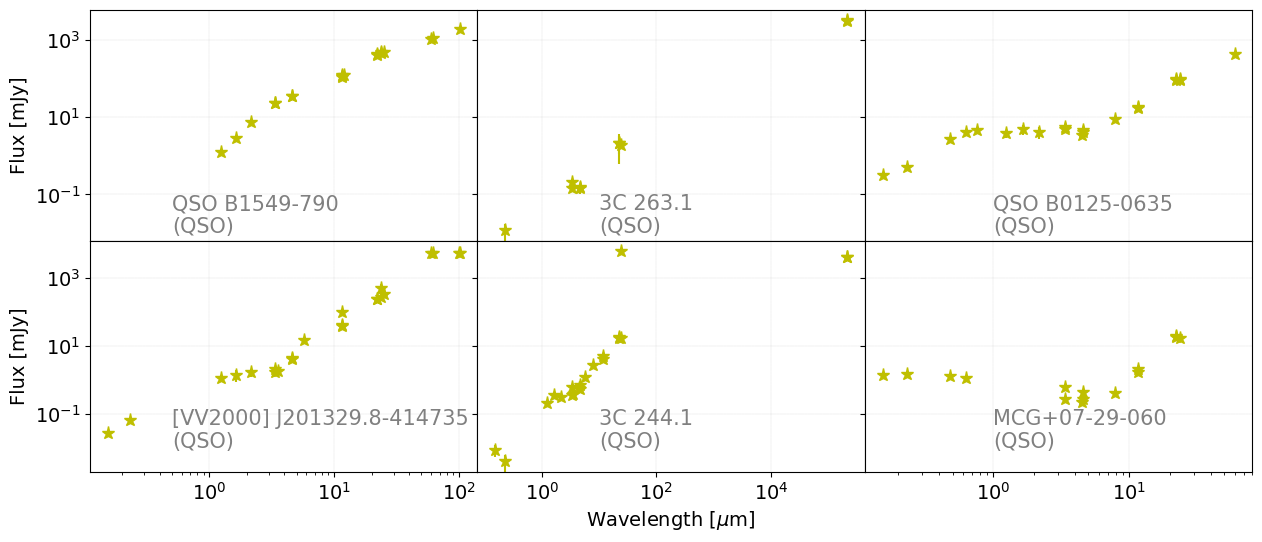

In [10]:
QSOs = ['QSO B1549-790','3C 263.1','QSO B0125-0635',
            '[VV2000] J201329.8-414735','3C 244.1','MCG+07-29-060']

fig, axs = plt.subplots(2,3,figsize=(15,6),sharex='col',sharey='row')

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
line_width = 0.8

i=0
j=0

for sed, gal in enumerate(QSOs):
    seds = Table.read(path_SED+gal+'_Phot.txt', format='ascii')
    axs[i,j].errorbar(seds['Wave'],seds['Flux']*1000,
                      yerr=seds['F_er']*1000,fmt='*y',markersize=9.5)
    axs[i,j].loglog()
    axs[i,j].grid(color='k', linestyle='--', linewidth=0.05)
    axs[i,0].set_ylabel('Flux [mJy]',fontsize=14)
    if i==0:
        y=1e-2
    elif i==1 or i==2:
        y=1e-2
    if j==0:
        x=5e-1
    elif j==1:
        x=10
    elif j==2:
        x=1
    axs[i,j].text(x,y,gal+'\n(QSO)',fontsize=15,color='gray')
    j+=1
    if j>2:
        i+=1
        j=0

axs[1,1].set_xlabel(r'Wavelength [$\mu$m]',fontsize=14)
plt.subplots_adjust(hspace=0.0,wspace=0.0) #Space between subplots
plt.savefig('SED_QSO.jpg')
plt.show()

### Notebook Info:

In [12]:
%load_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.12.0
IPython version      : 8.14.0

Compiler    : GCC 13.2.1 20230918 (Red Hat 13.2.1-3)
OS          : Linux
Release     : 6.5.11-300.fc39.x86_64
Machine     : x86_64
Processor   : 
CPU cores   : 16
Architecture: 64bit

Specific Python packages
astropy: 5.3.2

astropy   : 5.3.2
numpy     : 1.24.4
matplotlib: 3.8.1

Watermark: 2.4.3

